### Last name: Lee
### First name: Ho Seok
### Student number: 1004112177
### List of collaborators (if any): 
* Damrongpiriyapong, Soraphol
* Last name, first name
* Last name, first name

Start by installing the ```Convex``` and ```SCS``` packages:

In [2]:
using Pkg

In [3]:
Pkg.add("Convex")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %>                                 ]  15.8 % %                 ]  56.2 % [=============================>           ]  72.0 %83.6 %>]  99.5 % Resolving package versions...
 Installed PlotThemes ───── v1.0.0
 Installed Tokenize ─────── v0.5.7
 Installed DataStructures ─ v0.17.6
 Installed GR ───────────── v0.44.0
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [864edb3b] ↑ DataStructures v0.17.5 ⇒ v0.17.6
  [28b8d3ca] ↑ GR v0.42.0 ⇒ v0.44.0
  [ccf2f8ad] ↑ PlotThemes v0.4.0 ⇒ v1.0.0
  [995b91a9] ↓ PlotUtils v0.6.1 ⇒ v0.6.0
  [0796e94c] ↑ Tokenize v0.5.6 ⇒ v0.5.7
  Building GR → `~/.julia/packages/GR/oiZD3/deps/build.log`


In [4]:
Pkg.add("SCS")

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [5]:
using Convex
using SCS

In [6]:
using Plots
using LinearAlgebra
using DelimitedFiles
using Statistics
using Random

┌ Info: Recompiling stale cache file /Users/hoseoklee/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240


In this exercise narrated and partially prepared by me (Mohannad Shehadeh), we'll be learning how to use the ```Convex``` modelling language to solve convex optimization problems. Similar enormously popular frameworks exist for other languages like ```CVX``` for MATLAB and ```CVXPY``` for Python, but all of these (including ```Convex```) came out of the same research group and are based on the same principles so what you learn will be transferable should you need to use another language in your future work or research. Documentation for ```Convex``` is available at https://www.juliaopt.org/Convex.jl/dev/ and you should keep this at hand.

For the purposes of this exercise, ```Convex``` will be acting as a magical blackbox which solves optimization problems and I will attempt to give you a hopefully not too hazy big picture view of how this works. This software has been designed for use by non-experts in convex optimization so a big picture view will suffice for doing a lot. In fact, learning to use this framework will give you a wizard-like ability to do things that would have required far more expertise and effort just 10 years ago and have endless and tremendous applications in industry and research.  

In the remaining weeks of the course, you will explore a little bit more deeply some of the things which I will gloss over.

Finally, as with previous exercises, reading and understanding the examples and instructions is the most important part and if you put effort there, only a small amount of simple code needs to be written.

# Part 1: Background and simple exercises

I'll start by providing the background needed to understand what the ```Convex``` package is and how it's used.  

Note that slightly more general definitions might exist than the definitions I'll provide here, for example, generalizing from a vector space to an affine space. So, be careful for possible differences in definitions when studying the course material later.

Let $x_1, \dots, x_K$ be a set of points (vectors) in a vector space $R^N$. A *convex combination* of these points is a point of the form $\alpha_1 x_1 + \dots + \alpha_K x_K$ where $\alpha_i \geq 0$ and $\sum_{i = 1}^K \alpha_i = 1$. In other words, a convex combination is a linear combination where the coefficients are nonnegative and add up to $1$.

A *convex set* is a subset of $R^N$ that is closed under convex combinations. Refer to https://en.wikipedia.org/wiki/Convex_set for some pictures.

Let $X \subseteq R^N$ be a convex set and let be $f\colon X \to R$ be a function. $f$ is said to be a *convex function* if, for all $x,y \in X$ and for any $\lambda \in R$ satisfying $0 \leq \lambda \leq 1$
\begin{equation}
    f(\lambda x + (1-\lambda)y) \leq \lambda f(x) + (1-\lambda) f(y)
\end{equation}

Refer to https://en.wikipedia.org/wiki/Convex_function for some pictures.

$f$ is said to be a *concave function* if $-f$ is a convex function, or, equivalently, the above inequality is reversed.

An *affine function* is one which is simultaneously concave and convex in which case it must be of the form $h(x) = Ax + b$ for some $A \in R^{M\times N}$ and $b \in R^M$.

Convex functions, apart from occurring naturally in many applications, have convenient mathematical properties like that, for example, any local minimum of a convex function is also a global minimum. 

A *convex optimization problem* is an optimization problem, which, in the standard form, is  

\begin{equation}
\begin{aligned}
& p^* = \underset{x}{\text{min}} & & f_0(x) \\
& \text{subject to} & &  f_i(x) \leq 0,\; \text{for}\; i = 1,\dots,m \\
& & & h_i(x) = 0,\; \text{for}\; i = 1,\dots,q\\
\end{aligned}
\end{equation}

(with $x \in R^N$) where:
- the objective function $f_0$ is convex
- the inequality constraint functions $f_i$ for $i = 1,\dots,m$ are convex 
- the equality constraint functions $h_i$ for $i = 1,\dots,q$ are affine

It can be shown that the set of points satisfying such constraints, called the *feasible set* (or region), is a convex set $X$.

If $X = R^N$, the problem is said to be *unconstrained*.

Nonconvex optimization is extremely difficult in general (for humans and computers), hence our interest in problems which can be cast in this form. Luckily, it turns out that a huge variety of problems can indeed be naturally expressed in this form. 

However, efficient generic methods for solving arbitary convex optimization problems are still an active area of research, so we must restrict ourself a little bit further to a subcategory of convex optimization problems. Luckily for us, this subcategory of problems will still be fairly broad and you're unlikely to come up with a convex optimization problem that doesn't fit into it.

A convex optimization problem where all of the functions involved, objectives and constraints, are linear or affine is called a linear program (LP). When the objective function is quadratic, it's called a quadratic program (QP). When the objective function and constraints are quadratic, it's called a quadratically constrained quadratic program (QCQP). Further classes include semidefinite programs (SDPs) and second-order cone programs (SOCPs). All of these categories of convex optimization problems fall into a broader category of convex optimization problems called cone programs (CPs). 

Cone programs can be solved highly efficiently by computers using cone program solvers. The ```SCS``` you installed was a cone program solver. Given a cone program, an appropriate specialized algorithm can be run to get to an optimal solution.

It turns out that a wide variety of convex optimization problems can be converted into equivalent cone programs. So, once you have a convex optimization problem, traditionally, you would try to convert it into an equivalent LP, QP, QCQP, or other CP. Once your problem is in such a form, you can use the appropriate specialized solver to get to your solution.

However, recognizing that a problem is convex, and figuring out how to convert it into a cone program can be quite difficult in general. You will learn how to do this in some common special cases in this course. 

Fortunately for you, the ```Convex``` modelling language (as well as ```CVX``` and ```CVXPY```) is exactly made for solving this problem. An approach called disciplined convex programming (DCP) is used to allow you to express a convex optimization problem in a way which allows ```Convex``` both to check that the problem is indeed convex and more importantly, convert the problem into a standard cone program form so that a specialized solver like ```SCS``` can be used to solve it. 

We will now demonstrate how DCP works by an example followed by some exercises. The overview is as follows:

- We start by specifying **variables** which are the values we would like to optimize with respect to. We can have the variables be a single vector, multiple vectors, or multiple scalars or combinations of both. In any case, they can be interpreted as one big vector but you can specify them however you want.
- We then specify **constants** which are numbers, vectors, and matrices involved in our objective and constraint functions which are fixed.
- Next, we create our **objective** and **constraints** using **expressions**
- These mathematical expressions must be built as a composition of predefined convex or affine functions called **atoms**. A list of these **atoms** can be found at https://www.juliaopt.org/Convex.jl/dev/operations/#Operations-1 and you must use them to create the expressions for your functions
- You cannot combine these atoms in an arbitary way, you must do it in a way which preserves convexity, e.g., sums of convex functions are convex, a composition of a convex and increasing function with a convex function is convex, and more
- ```Convex``` will check whether the expression you created follows the rules and will throw an error if it didn't so you won't actually have to worry about it, however, if you'd like to learn these rules, you can look at https://dcp.stanford.edu/rules
- Finally, you define a **problem** using your objective and constraints which are made of expressions which are made of variables and ```Convex``` magically solves it

Let's go.

First, a remark on notation: Let $x,y \in R^N$. The notation $x \leq y$ will mean component-wise inequality, i.e., $x_i \leq y_i$ for $i = 1,\dots,N$.

Consider the following linear program (adapted from [here](https://www.juliaopt.org/Convex.jl/dev/examples/general_examples/basic_usage/)) where $c, x \in R^N$, $b \in R^M$ and $A \in R^{M \times N}$

\begin{equation}
\begin{aligned}
& p^* = \underset{x}{\text{min}} & & c^Tx \\
& \text{subject to} & &  Ax \leq b \\
& & & x \geq 1\\
& & & x \leq 10\\
& & & x_2 \leq 5\\
& & & x_1 + x_4 - x_2 \leq 10\\
\end{aligned}
\end{equation}


I'll define the constants of the problem. Let $N = M = 4$ and:

In [7]:
c = [1, 2, 3, 4]

4-element Array{Int64,1}:
 1
 2
 3
 4

In [8]:
A = [1 0 0 0; 0 1 0 0; 0 0 1 0; 0 0 0 1]

4×4 Array{Int64,2}:
 1  0  0  0
 0  1  0  0
 0  0  1  0
 0  0  0  1

In [9]:
b = [10, 10, 10, 10]

4-element Array{Int64,1}:
 10
 10
 10
 10

Let's define the variables now. In this case, there's only one $4$-dimensional variable $x$. We define a variable using

```<variable name> = Variable(<size>)``` 

as follows:

In [10]:
x = Variable(4)

Variable
size: (4, 1)
sign: real
vexity: affine
id: 673…786

Now we would like to define our objective function. We are only allowed to create expressions from operations and atoms listed here: https://www.juliaopt.org/Convex.jl/dev/operations/#Operations-1. If you get an error when trying to create an expression, try to find what you need in that list. 

In [11]:
objective = c'*x

* (affine; real)
├─ 1×4 Adjoint{Int64,Array{Int64,1}}
└─ 4-element real variable (id: 673…786)

Now we add constraints. We create an array of constraint expressions using ```<=```, ```>=```, and ```==``` and allowed atoms and operations.

```constraints = [expression1, expression2, expression3, expression4]```

We can also add expressions to our constraint list using ```+=``` 

```constraints += expression5```

in case the list is too big. 

Add the first two constraints:

In [12]:
constraints = [A*x <= b, x >= 1]

2-element Array{Constraint,1}:
 <= constraint (affine)
├─ * (affine; real)
│  ├─ 4×4 Array{Int64,2}
│  └─ 4-element real variable (id: 673…786)
└─ 4-element Array{Int64,1}
 >= constraint (affine)
├─ 4-element real variable (id: 673…786)
└─ 1                                                                       

Add three more:

In [13]:
constraints += x <= 10
constraints += x[2] <= 5
constraints += x[1] + x[4] - x[2] <= 10

5-element Array{Constraint,1}:
 <= constraint (affine)
├─ * (affine; real)
│  ├─ 4×4 Array{Int64,2}
│  └─ 4-element real variable (id: 673…786)
└─ 4-element Array{Int64,1}                                                                                                                            
 >= constraint (affine)
├─ 4-element real variable (id: 673…786)
└─ 1                                                                                                                                                                                                   
 <= constraint (affine)
├─ 4-element real variable (id: 673…786)
└─ 10                                                                                                                                                                                                  
 <= constraint (affine)
├─ index (affine; real)
│  └─ 4-element real variable (id: 673…786)
└─ 5                                                                              

We now define the problem. If the problem is unconstrained, we use

```problem = minimize(objective)```

If the problem is constrained, we use

```problem = minimize(objective, constraints)```

In [14]:
problem = minimize(objective, constraints)

minimize
└─ * (affine; real)
   ├─ 1×4 Adjoint{Int64,Array{Int64,1}}
   └─ 4-element real variable (id: 673…786)
subject to
├─ <= constraint (affine)
│  ├─ * (affine; real)
│  │  ├─ 4×4 Array{Int64,2}
│  │  └─ 4-element real variable (id: 673…786)
│  └─ 4-element Array{Int64,1}
├─ >= constraint (affine)
│  ├─ 4-element real variable (id: 673…786)
│  └─ 1
├─ <= constraint (affine)
│  ├─ 4-element real variable (id: 673…786)
│  └─ 10
├─ <= constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 4-element real variable (id: 673…786)
│  └─ 5
└─ <= constraint (affine)
   ├─ + (affine; real)
   │  ├─ index (affine; real)
   │  │  └─ …
   │  ├─ index (affine; real)
   │  │  └─ …
   │  └─ - (affine; real)
   │     └─ …
   └─ 10

current status: not yet solved

We solve the problem with our ```SCS``` solver using ```solve!(problem, SCSSolver())```

In [15]:
solve!(problem, SCSSolver())

----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 21, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 5, constraints m = 15
Cones:	primal zero / dual free vars: 1
	linear vars: 14
Setup time: 8.68e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.36e+01  1.85e+01  9.96e-01 -2.24e+02 -0.00e+00  0.00e+00  6.05e-05 
    40| 6.09e-08  4.40e-07  1.43e-07  1.00e+01  1.00e+01  3.20e-14  1.93e-04 
-------------------------------------------------------------------

We obtain the optimizing value for a variable ```x``` after solving the problem using ```x.value``` and we obtain the optimal value of the objective function using ```problem.optval```

In [16]:
x_star = x.value # Should be all ones 

4×1 Array{Float64,2}:
 1.0000001610819924
 0.9999994724254981
 0.9999999162173058
 0.9999995837514231

In [17]:
p_star = problem.optval # Should be 10

9.999998788041914

**Exercise:** Solve Exercise 9.5 (An optimal breakfast) on page 342 of your textbook  using ```Convex``` as we just did. Store the answer for the optimal cost in a variable called ```p_star``` and the optimizing amount of servings of Corn, Milk, Bread in a vector called ```x_star```. Note that your amounts of servings need not be integers and that the constraint on the maximum number of servings is per each food type. The correct answer and an answer check cell which you should run have been provided. Note further that you can define three $1$-dimensional variables OR you can define one $3$-dimensional variable depending on whether you prefer to express things in terms of dot products or linear equations.

In [18]:
# BEGIN SOLUTION
c = [0.15, 0.25, 0.05]
x = Variable(3)

objective = c'*x

constraints = [107*x[1] + 500*x[2] >= 5000,
                107*x[1] + 500*x[2] <= 10000,
    
                45*x[1] + 40*x[2] + 60*x[3] <= 1000,
    
                70*x[1] + 121*x[2] + 65*x[3] >= 2000,
                70*x[1] + 121*x[2] + 65*x[3] <= 2250,
    
                x <= 10]

problem = minimize(objective, constraints)
solve!(problem, SCSSolver())

x_star = x.value
p_star = problem.optval

----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 20, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 4, constraints m = 9
Cones:	primal zero / dual free vars: 1
	linear vars: 8
Setup time: 3.18e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 2.37e+00  1.89e+00  8.52e-01 -6.05e+01 -4.38e+00  0.00e+00  2.00e-05 
   100| 1.30e-06  3.99e-06  3.08e-06  3.74e+00  3.74e+00  2.90e-16  2.36e-04 
---------------------------------------------------------------------

3.7412391692830327

Answer check:

In [19]:
p_star_ref = 3.7412
x_star_ref = [6.5882, 10, 5.0588]
@assert norm(p_star_ref-p_star) < 10^-3 && norm(x_star_ref-x_star) < 10^-3

---------------------

For the following three questions:

Let $x \in R^N$, $b \in R^M$ and $A \in R^{M \times N}$.

Let $||v||_p$ denote the $p$-norm of a vector $v \in R^N$ or $v \in R^M$. 

Moreover, $N = 7$, $M = 4$ and $A$, $b$ are constants defined in the following cell:

In [19]:
A = [0.947931  0.0639746  0.0377269  0.399518   0.01464    0.952785   0.80076; 
 0.773775  0.607076   0.412492   0.0761318  0.947795   0.0368772  0.232726;
 0.388207  0.165969   0.936847   0.608555   0.172854   0.1524     0.778316;
 0.931932  0.302759   0.516603   0.272542   0.0454645  0.392813   0.890168];
b = 10*[0.036360155695131624,
 0.6573670082214775,  
 0.030290614404246075,
 0.37546120019099893];

**Exercise:** 

\begin{equation}
\begin{aligned}
& p^* = \underset{x}{\text{min}} & & ||Ax - b||_2^2\\
\end{aligned}
\end{equation}

Solve this convex optimization problem using ```Convex``` and store the the optimizing value of $x$ in a variable called ```x_1```. Store the optimal value of the objective in a variable called ```p_1```.

Recall that you must find the atoms needed to define your expressions in https://www.juliaopt.org/Convex.jl/dev/operations/ and might not be able to use the usual linear algebra syntax. 

In [20]:
# BEGIN SOLUTION
x = Variable(7)

objective = sumsquares(A*x - b)

problem = minimize(objective, constraints)
solve!(problem, SCSSolver())

x_1 = x.value
p_1 = problem.optval

show(x_1)
show(p_1)

[2.2737907338430916; 7.168652404420371; 0.5493083659037235; -5.030181294279668; 0.4191011378266073; -1.246802953860335; 1.1493103397851303]5.249302314733796e-7----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 50, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 13, constraints m = 18
Cones:	primal zero / dual free vars: 1
	linear vars: 9
	soc vars: 8, soc blks: 2
Setup time: 2.65e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.19e+01  8.32e+00  8.71e-01 -

Answer check:

In [21]:
@assert norm(p_1) < 10^-5

**Exercise:** 

\begin{equation}
\begin{aligned}
& p^* = \underset{x}{\text{min}} & & ||Ax - b||_2^2 + ||x||_1\\
\end{aligned}
\end{equation}

Solve this convex optimization problem using ```Convex``` and store the the optimizing value of $x$ in a variable called ```x_2```. Store the optimal value of the objective in a variable called ```p_2```.

Recall that you must find the atoms needed to define your expressions in https://www.juliaopt.org/Convex.jl/dev/operations/ and might not be able to use the usual linear algebra syntax. 

In [22]:
# BEGIN SOLUTION
x = Variable(7)

objective = sumsquares(A*x - b) + norm(x, 1)

problem = minimize(objective, constraints)
solve!(problem, SCSSolver())

x_2 = x.value
p_2 = problem.optval

show(x_2)
show(p_2)

[0.7629204780250665; 7.334288632235564; 4.616813207818874e-8; -0.6822495006592438; 0.9677152334523461; -2.075669889064192e-8; -2.8994324720010112e-8]12.37351604997867----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 85, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 20, constraints m = 32
Cones:	primal zero / dual free vars: 1
	linear vars: 23
	soc vars: 8, soc blks: 2
Setup time: 3.00e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.25e+19  3.96e+19  9.

Answer check:

In [23]:
p_2_ref = 12.373478296466208
@assert norm(p_2_ref - p_2) < 10^-3

**Exercise:**

We introduce a new variable $z \in R^N$ so that we are now optimizing with respect to both $x$ and $z$. 

\begin{equation}
\begin{aligned}
& p^* = \underset{x, z}{\text{min}} & & ||Ax - b||_2^2 + \sum_{i = 1}^N z_i\\
& \text{subject to} & & x \leq z\\
& & & x \geq -z\\
\end{aligned}
\end{equation}

Solve this convex optimization problem using ```Convex``` and store the the optimizing value of $x$ in a variable called ```x_3```. Store the optimal value of the objective in a variable called ```p_3```.

In [1]:
# BEGIN SOLUTION
x = Variable(7)
z = Variable(7)

objective = sumsquares(A*x - b) + sum(z)

constraints = [x <= z, x >= -z]

problem = minimize(objective, constraints)
solve!(problem, SCSSolver())

x_3 = x.value
p_3 = problem.optval

show(x_3)
show(p_3)

UndefVarError: UndefVarError: Variable not defined

**Exercise:** Examine the values of ```x_1```, ```p_1```, ```x_2```, ```p_2```, ```x_3```, ```p_3``` and answer the following. 
- How do ```x_1``` and ```x_2``` compare? What is the effect of the $1$-norm term?
- How do ```x_2``` and ```x_3``` compare?  Why do you think this is the case and why might one pose the optimization problem in this second way? 

Answers: (Your written answer goes here.) The values of ```x_1``` and ```x_2``` are fairly different. This is due to the fact that ```x_1``` only solves for the equation 

\begin{equation}
\begin{aligned}
Ax = b
\end{aligned}
\end{equation}

(attempts to minimize the error) while ```x_2``` attempts to both solve for the equation and minimize each component of ```x_2```. 

```x_2``` and ```x_3```, however, are identical, since they are both optimizing for the same problem. ```x_2``` is optimizing

\begin{equation}
\begin{aligned}
& p^* = \underset{x}{\text{min}} & & ||Ax - b||_2^2 + ||x||_1\\
\end{aligned}
\end{equation}

while ```x_3``` is optimizing for 

\begin{equation}
\begin{aligned}
& p^* = \underset{x}{\text{min}} & & ||Ax - b||_2^2 + ||z||_1, z = x\\
\end{aligned}
\end{equation}

If the optimization problem is formatted as the latter, then it allows more flexibility for what values ```z``` could take on, by simply changing the constraints.

Recall that in Numerical Exercise 1, we had this rank 2 matrix:

In [25]:
V = [1.0  1.0  0.0  0.0;
 -1.0  0.0  1.0  0.0;
  1.0  1.0  0.0  0.0]

3×4 Array{Float64,2}:
  1.0  1.0  0.0  0.0
 -1.0  0.0  1.0  0.0
  1.0  1.0  0.0  0.0

In [26]:
rank(V)

2

And we wanted to project this vector ```v``` onto the span of its columns:

In [27]:
v = [4,7,7]

3-element Array{Int64,1}:
 4
 7
 7

We did this via Gram-Schmidt and the projection of ```v``` onto the span of its columns turned out to be:

In [28]:
v_hat_ref = [5.5, 7.0, 5.5]

3-element Array{Float64,1}:
 5.5
 7.0
 5.5

Recall that anything in the span of the columns of $V \in R^{3\times4}$ can be expressed as $Vb$ for some $b \in R^4$. So, the projection of $v$ onto the span of the columns of $V$ is $\hat{v}= Vb$ for some $b$. 

Since the columns of $b$ are not linearly independent, this $b$ is not unique, i.e., there is more than one possible choice of $b$. Though we won't really care about that here, they all yield the same $Vb$. 

Recall further that the projection of $v$ onto the span of the columns of $V$ is the vector $\hat{v}$ in the span of the columns $V$ which is closest in Euclidean distance to $v$. 

**Exercise:** Find the projection of ```v``` onto the span of the columns of ```V``` by solving the appropriate optimization problem using ```Convex``` and store the projection in a variable called ```v_hat```.

In [47]:
# BEGIN SOLUTION
b = Variable(4)

objective = norm(v - (V*b))

problem = minimize(objective, constraints)
solve!(problem, SCSSolver())

b_ = b.value
p_4 = problem.optval
v_hat = V*b_

WARN: m less than n, problem likely degenerate
WARN: A->p (column pointers) not strictly increasing, column 4 empty
----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 37, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 20, constraints m = 19
Cones:	primal zero / dual free vars: 1
	linear vars: 14
	soc vars: 4, soc blks: 1
Setup time: 6.95e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.06e+19  2.33e+19  1.00e+00 -6.97e+20  2.07e+19  2.49e+20  2.44e-05 
  

3×1 Array{Float64,2}:
 5.499996251282962
 6.999995226280202
 5.499996251282962

Answer check:

In [48]:
@assert norm(v_hat_ref-v_hat) < 10^-4

# Part 2: Slalom

In this part, you will need to solve Exercise 9.2 (A slalom problem) on page 341 of your textbook. Start by reading the question once before proceeding.

The data from the table has been entered for you here:

In [49]:
x = Float64[0,4,8,12,16,20,24]
y = Float64[4,5,4,6,5,7,4]
c = Float64[0,3,2,2,1,2,0]

7-element Array{Float64,1}:
 0.0
 3.0
 2.0
 2.0
 1.0
 2.0
 0.0

The following provides a plot of the upper and lower ends of the gates:

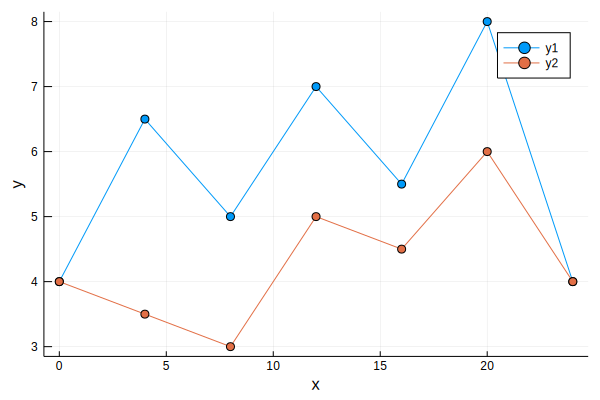

In [50]:
plot(x, y + c/2, marker=true)
plot!(x, y - c/2, marker=true)
xlabel!("x")
ylabel!("y")

The problem is then to find the shortest path which fits between the two curves above.

Let the optimal trajectory be the set of points $(x_0, z_0),\dots,(x_6, z_6)$.

The $x_i$ are fixed and the only thing to optimize is the vertical coordinates $z_i,\; i = 0,\dots,6$. 

**Exercise:** Solve for this optimizing vector $z \in R^7$ using ```Convex``` and store its value in a variable called ```z_```. Store the optimal value of the distance (the minimum distance) in a variable called ```p_star```. 

The correct answer and an answer checking cell has been provided which you should run. 

Note that to construct a vector of ```Convex``` variables and constants, you must do it with ```;```, for example, ```v = [a1; a2; a3]```, so that it is explicitly designated as a column vector. 

In [74]:
# BEGIN SOLUTION
z = Variable(7)

objective = sum([norm([z[2] - z[1]; x[2] - x[1]]); 
                norm([z[3] - z[2]; x[3] - x[2]]); 
                norm([z[4] - z[3]; x[4] - x[3]]); 
                norm([z[5] - z[4]; x[5] - x[4]]); 
                norm([z[6] - z[5]; x[6] - x[5]]); 
                norm([z[7] - z[6]; x[7] - x[6]])])

constraints = [z <= y + c/2, z >= y - c/2]

problem = minimize(objective, constraints)
solve!(problem, SCSSolver())

z_ = z.value
p_star = problem.optval

----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 39, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 14, constraints m = 33
Cones:	primal zero / dual free vars: 1
	linear vars: 14
	soc vars: 18, soc blks: 6
Setup time: 2.07e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.54e+01  7.29e+00  9.99e-01 -4.69e+02  3.55e+02  1.25e-13  1.95e-05 
    40| 3.11e-09  1.95e-08  4.49e-09  2.46e+01  2.46e+01  1.27e-14  2.04e-04 
---------------------------------------

24.573423570725293

The following code will plot your path ```z_``` so you can see whether it violates the constraints:

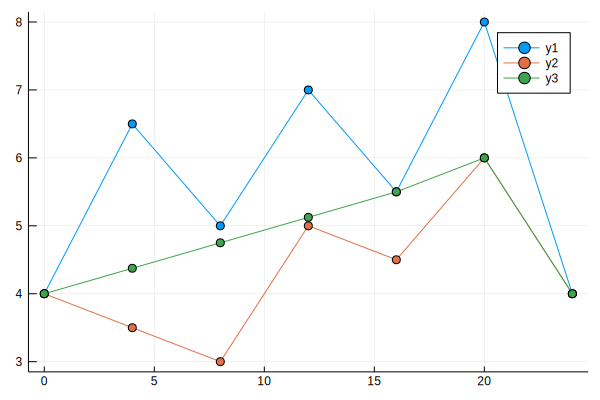

In [75]:
plot(x, y + c/2, marker=true)
plot!(x, y - c/2, marker=true)
plot!(x, z_, marker=true)

Answer check:

In [76]:
z_ref = [4, 4.375, 4.75, 5.125, 5.5, 6, 4]
p_star_ref = 24.5734
@assert norm(p_star_ref-p_star) < 10^-4 && norm(z_ref-z_) < 10^-4

# Part 3: Support-vector machines

In this part, I will first direct you to Wikipedia to read a short section on linear support-vector machines (SVMs). It's concise and has a nice diagram: https://en.wikipedia.org/wiki/Support-vector_machine#Linear_SVM. In particular, we'll be interested in the soft-margin SVM, but you'll need to read both the hard-margin and soft-margin part to understand.

Next, scroll all the way to the end of this page: https://www.juliaopt.org/Convex.jl/dev/operations/ and read the little note on type promotions and the ```max(x, 0)``` atom. 

The code for doing this part of the exercise is actually available in the documentation so you will just need to understand it and modify it accordingly. Here it is: https://www.juliaopt.org/Convex.jl/dev/examples/general_examples/svm/. You should read this as well. 

Once you've done this, we can start.

In the first part of this part, we'll do something in two dimensions just so you can easily visualize what's going on and in the second part, we'll revisit our classifying wheat seeds problem from the previous exercise and do the exact same thing in seven dimensions.

We'll start by creating a dataset of 200 randomly generated points in $R^2$ centered around different places. We'll assign the points the two categories $1$ and $-1$. The 200 points are stored in a matrix called ```X``` whose columns are those points and the labels for those points $1$ and $-1$ are stored in ```Y```. 

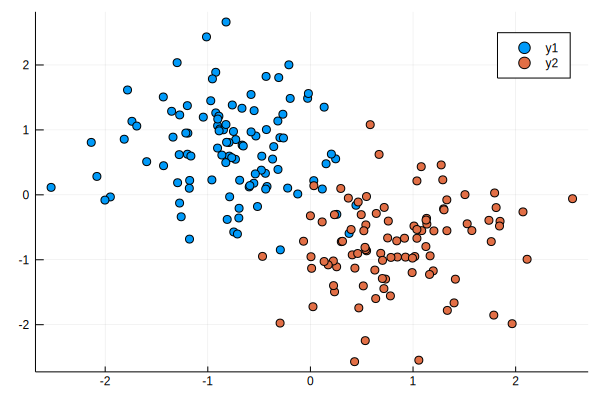

In [77]:
X = zeros(2,200)
Y = zeros(200)

# Start of generating data
for i = 1:200
    coin_flip = abs(rand(Int64)%2) # 50-50 chance of being 1 or 0
    
    if (coin_flip == 0) 
        X[:,i] = randn(2,1) .+ 2.5*[-1,1]
        Y[i] = 1
    else
        X[:,i] = randn(2,1) .+ 0.5*[1,1]
        Y[i] = -1
    end
end
# Standardize the data points to have zero mean and unit standard deviation
means = mean(X, dims=2)[:] # Means
std_factor = [(1.0./std(X, dims= 2)[i])*(i == j) for i = 1:2, j = 1:2] # 1 / (standard deviations)
X = X .- means # Subtract means 
X = std_factor*X # Standardize 
# End of generating data

scatter(X[1,Y .== 1],X[2,Y .== 1])
scatter!(X[1,Y .== -1],X[2,Y .== -1])

Notice how we can obtain the data points corresponding to a particular label by indexing the data points with the 

boolean vector ```Y .== 1``` or ```Y .== -1```.

For example, to get the data points with the ```-1``` label, we use:

In [78]:
X[:,Y .== -1]

2×96 Array{Float64,2}:
  1.52767    1.7869   -5.63494e-5  …   0.916927   0.369668   1.50618   
 -0.445905  -1.85236  -0.322594       -0.667883  -0.0504771  0.00311057

You can use this in doing this next question.

**Exercise:** Using ```Convex``` and referring to the example in the Julia documentation here: https://www.juliaopt.org/Convex.jl/dev/examples/general_examples/svm/, solve for the optimizing $w \in R^2$ and $b \in R$ which describe the line best separating the labelled data points we just created. You can use $C = 1$. 

Store the values of the optimizing vector $w$ and scalar $b$ in variables called ```w_``` and ```b_``` respectively. 

Note that we don't call our data points from each category $x_i$ and $y_i$ as in the documentation, our ```X``` are all the data points and our ```Y``` is the corresponding labels so don't get confused by this. Moreover, you don't need to do exactly as in the documentation creating a function, just understand and copy what you need.

In [83]:
# BEGIN SOLUTION
# Create variables for the separating hyperplane w'*x = b.
w = Variable(2)
b = Variable()
# Form the objective.
obj = sumsquares(w) + sum(max(1+b-w'*X[:,Y .== 1], 0)) + sum(max(1-b+w'*X[:,Y .== -1], 0))
# Form and solve problem.
problem = minimize(obj)
solve!(problem, SCSSolver())
w_ = evaluate(w)
b_ = evaluate(b)

----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 1208, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 206, constraints m = 408
Cones:	primal zero / dual free vars: 1
	linear vars: 401
	soc vars: 6, soc blks: 2
Setup time: 1.27e-04s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 8.12e+20  2.86e+21  1.00e+00 -2.17e+22  1.40e+22  2.60e+21  9.98e-04 
   100| 1.15e-07  4.54e-06  3.13e-07  2.39e+01  2.39e+01  7.65e-15  1.20e-02 
-----------------------------------

-0.13995349922107342

The line in the $x$-$y$ plane is given by $w_1x + w_2y = b$ so we plot it and the data accordingly. If you did this correctly, the plotted line should look like it's separating the classes well.

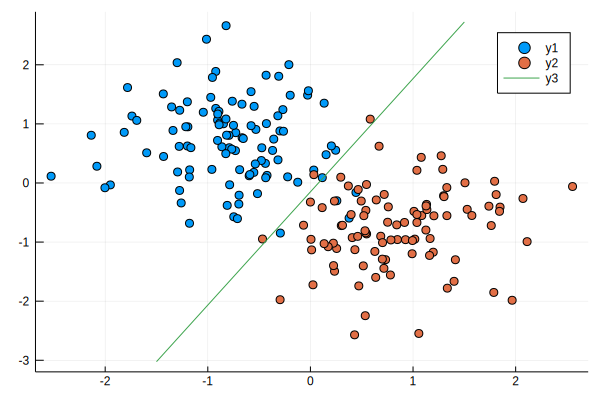

In [84]:
scatter(X[1,Y .== 1],X[2,Y .== 1])
scatter!(X[1,Y .== -1],X[2,Y .== -1])
x = [i for i = -1.5:0.1:1.5]
y = (-w_[1]/w_[2])*x .+ b_/w_[2]
plot!(x,y)

We now look at the accuracy of the classification of the points, i.e., what proportion of the points above the line are actually labelled $1$. Checking whether a point is above or below the line amounts to checking the sign of $w^Tx-b$ which is what we do. 

In [85]:
predictions = sign.(w_'*X .- b_)[:]
accuracy = sum(predictions .== Y)/length(predictions)*100

96.5

If you did this correctly, the accuracy should be in the high $90$s. 

In [86]:
@assert accuracy > 90

-----------------

The following cell is the exact same cell which loads the wheat seeds data from the last exercise except for one difference. Rather than the ```Y```s containing $1$, $2$, $3$ for the three categories of seeds, the ```Y```s contain $1$ if the seed is of type $3$ and $-1$ otherwise. 

Refer to the instructions of the previous exercise if you don't recall the meaning and context of this data. 

In [87]:
Data = readdlm("seeds_dataset.txt", '\t', '\n') # Load data
X = zeros(7,210) # Data
Y = zeros(1,210) # Labels
X[1,:] = convert(Array{Float64,1}, Data[:,1]) # 7 different attributes
X[2,:] = convert(Array{Float64,1}, Data[:,2]) 
X[3,:] = convert(Array{Float64,1}, Data[:,3]) 
X[4,:] = convert(Array{Float64,1}, Data[:,4]) 
X[5,:] = convert(Array{Float64,1}, Data[:,5]) 
X[6,:] = convert(Array{Float64,1}, Data[:,6]) 
X[7,:] = convert(Array{Float64,1}, Data[:,7]) 
Y = Data[:,8] # Labels
Y = [Y[i] == 3 ? 1 : -1 for i in 1:210]
I = randperm(210) # Random permutation of indices
I_TRAINING = I[1:160] # Training subset
I_TESTING = I[160:210] # Testing subset
X_TRAINING = X[:,I_TRAINING]
Y_TRAINING = Y[I_TRAINING]
means = mean(X_TRAINING, dims=2)[:] # Means
std_factor = [(1.0./std(X_TRAINING, dims=2)[i])*(i == j) for i = 1:7, j = 1:7] # 1 / (standard deviations)
X_TRAINING = X_TRAINING .- means # Subtract means from training data
X_TRAINING = std_factor*X_TRAINING # Standardize training data
X_TESTING = X[:,I_TESTING] 
Y_TESTING = Y[I_TESTING]
X_TESTING = X_TESTING .- means # Subtract means and standardize testing data
X_TESTING = std_factor*X_TESTING;

In [88]:
X_TRAINING

7×160 Array{Float64,2}:
 -1.36598    1.79829   -1.37639   …  -0.0232462   1.87462   -1.01208 
 -1.3009     1.84301   -1.22403      -0.0248861   1.92757   -1.0088  
 -1.85795    0.20537   -2.47777       0.400886    0.134651  -0.75557 
 -0.979479   2.36343   -0.673139     -0.123067    2.00119   -0.99066 
 -1.66371    1.39205   -1.61517       0.0327356   1.41902   -1.10812 
  0.754413  -0.277435   1.14691   …  -0.062171   -1.14236   -0.054437
 -0.601023   2.3521    -0.388785     -0.338253    1.61433   -0.691981

In [89]:
Y_TRAINING

160-element Array{Int64,1}:
  1
 -1
  1
  1
 -1
 -1
 -1
  1
 -1
 -1
 -1
 -1
  1
  ⋮
 -1
 -1
 -1
  1
 -1
  1
  1
 -1
 -1
 -1
 -1
  1

We will now attempt to identify the type $3$ seeds in the training set by using a separating hyperplane for the seven-dimensional seed features directly.

**Exercise:** Using ```Convex``` and repeating the exact same thing you did in the previous question, solve for the optimizing $w \in R^7$ and $b \in R$ which describe the hyperplane best separating the seven-dimensional data points in ```X_TRAINING``` corresponding to the $1$ and $-1$ labels which are in ```Y_TRAINING```. You can use $C = 1$. 

Store the values of the optimizing vector $w$ and scalar $b$ in variables called ```w_``` and ```b_``` respectively. 

In [90]:
# BEGIN SOLUTION
# Create variables for the separating hyperplane w'*x = b.
w = Variable(7)
b = Variable()
# Form the objective.
obj = sumsquares(w) + sum(max(1+b-w'*X_TRAINING[:,Y_TRAINING .== 1], 0)) + sum(max(1-b+w'*X_TRAINING[:,Y_TRAINING .== -1], 0))
# Form and solve problem.
problem = minimize(obj)
solve!(problem, SCSSolver())
w_ = evaluate(w)
b_ = evaluate(b)

----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 1773, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 171, constraints m = 333
Cones:	primal zero / dual free vars: 1
	linear vars: 321
	soc vars: 11, soc blks: 2
Setup time: 1.01e-04s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 4.85e+20  2.25e+21  1.00e+00 -1.21e+22  7.29e+21  2.01e+21  3.03e-04 
   100| 2.11e-03  6.76e-02  2.85e-03  1.38e+01  1.37e+01  1.88e-14  1.51e-02 
   200| 1.82e-06  2.15e-05  1.10e-

1.4537226477156662

We now check the accuracy of identification of the type $3$ seeds (which we assign the label $1$) by applying our predictor on the testing set. As with the previous question, this categorization is based on the sign of $w^Tx-b$. If you did the previous part correctly, this accuracy should be in the $90$s. 

In [91]:
predictions = sign.(w_'*X_TESTING.- b_)[:]
accuracy = sum(predictions .== Y_TESTING)/length(predictions)*100

90.19607843137256

In [92]:
@assert accuracy > 90

------------------------